In [3]:
import cv2
from matplotlib import pyplot as plt
import os


class Matcher:
    def __init__(self, path01, path02):
        self.image_path_src = path01
        self.image_path_dest = path02

    def brute_force_matcher(self):
        """Brute-Force Matching with ORB Descriptors"""

        img1 = cv2.imread(self.image_path_src, cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(self.image_path_dest, cv2.IMREAD_GRAYSCALE)  #

        # Initiate ORB detector
        orb = cv2.ORB_create()
        # find the keypoints and descriptors with ORB
        kp1, des1 = orb.detectAndCompute(img1, None)
        kp2, des2 = orb.detectAndCompute(img2, None)

        # create BFMatcher object
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        # Match descriptors.
        matches = bf.match(des1, des2)
        # Sort them in the order of their distance.
        matches = sorted(matches, key=lambda x: x.distance)
        # Draw first 10 matches.
        img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None,
                               flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        plt.imshow(img3)
        plt.show()

    def flann_matcher(self):

        img1 = cv2.imread(self.image_path_src, cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(self.image_path_dest, cv2.IMREAD_GRAYSCALE)

        # Initiate SIFT detector
        sift = cv2.SIFT_create()
        # find the keypoints and descriptors with SIFT
        kp1, des1 = sift.detectAndCompute(img1, None)
        kp2, des2 = sift.detectAndCompute(img2, None)

        # FLANN parameters
        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
        search_params = dict(checks=50)
        flann = cv2.FlannBasedMatcher(index_params, search_params)
        matches = flann.knnMatch(des1, des2, k=2)

        # Need to draw only good matches, so create a mask
        matchesMask = [[0, 0] for i in range(len(matches))]
        for i, (m, n) in enumerate(matches):
            if m.distance < 0.7 * n.distance:
                matchesMask[i] = [1, 0]
        draw_params = dict(matchColor=(0, 255, 0),
                           singlePointColor=(255, 0, 0),
                           matchesMask=matchesMask,
                           flags=cv2.DrawMatchesFlags_DEFAULT)
        img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)
        plt.imshow(img3, )
        plt.show()

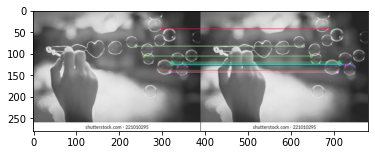

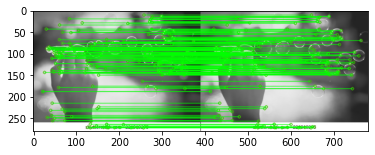

In [4]:
# # feature matching using flann and brute-force orb
image_path_src = os.path.join("test.jpg")
image_path_dest = os.path.join("test.jpg")
matcher_obj = Matcher(image_path_src, image_path_dest)
matcher_obj.brute_force_matcher()
matcher_obj.flann_matcher()